# Лабораторная работа № 1. Линейная регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Обучите модель линейной регрессии оценивать  вес человека. Для начала постройте одномерную модель, где в качестве единственного признака будет только вес, который человек сообщил о себе сам. Для обучения линейной модели используейте класс из библиотеки scikit-learn - [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
ds = pd.read_csv('Davis.csv', index_col=0)
ds

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


In [3]:
from sklearn.linear_model import LinearRegression

## Задание

1. Обучите модель линейной регресси на данных, используя в качестве целевой переменной рост (height), а в качестве признака вес (weight).
2. Вычислите значение среднеквадратичной ошибки для построенной модели
3. Постройте прямую регресии и точки обучающей выборки
4. Расширьте пространство признаков, добавив туда пол и repwt.
5. Оцените как изменилась среднеквадратичная ошибка

In [4]:
#Load dataset
from sklearn.model_selection import train_test_split
ds = pd.DataFrame(ds.dropna())
y = pd.DataFrame(ds['height'])
X_train, X_valid, y_train, y_valid = train_test_split(ds, y, test_size = 0.15)
x_train = pd.DataFrame(X_train["weight"])
x_valid = pd.DataFrame(X_valid["weight"])
x_train

,weight
178,66
85,56
101,55
200,79
90,57
...,...
143,53
169,96
36,64
122,69


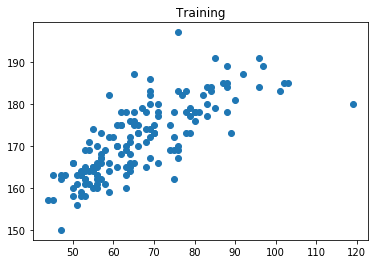

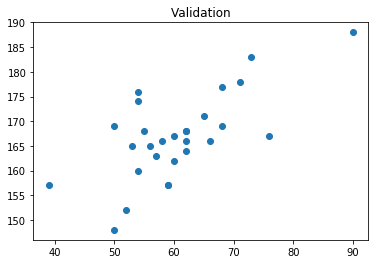

In [5]:
plt.scatter(x_train, y_train, label='Training')
plt.title('Training')
plt.show()
plt.scatter(x_valid, y_valid, label='Validation')
plt.title('Validation')
plt.show()



In [6]:
#Learning
reg = LinearRegression().fit(x_train, y_train)

In [7]:
#Coefficient of determination R^2
reg.score(x_train, y_train)

0.6027280186676232

In [8]:
#Coefficient of determination R^2of validation
reg.score(x_valid, y_valid)

0.40991152120831864

In [9]:
#Get prediction
y_predict = reg.predict(x_valid)

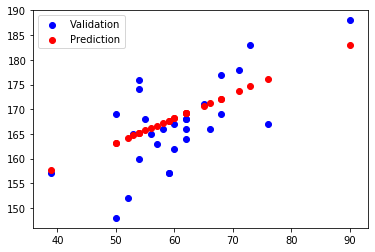

In [10]:
p1 = plt.scatter(x_valid, y_valid, c = 'blue')
p2 = plt.scatter(x_valid, y_predict, c = 'red')
plt.legend((p1, p2),("Validation", "Prediction"))
plt.show()

In [11]:
print("Среднеквадратичная ошибка: ", mean_squared_error(y_valid, y_predict))

Среднеквадратичная ошибка:  43.6266562451559


# Расширенная задача

In [12]:
X_train = pd.DataFrame(X_train.drop(['repht', 'height'], axis = 1))
X_train['sex'] = X_train['sex'].map({'F' : 0, "M" : 1}).astype(int)

X_valid = pd.DataFrame(X_valid.drop(['repht', 'height'], axis = 1))
X_valid['sex'] = X_valid['sex'].map({'F' : 0, "M" : 1}).astype(int)

In [13]:
X_train

,sex,weight,repwt
178,1,66,67.0
85,0,56,56.0
101,0,55,55.0
200,1,79,81.0
90,0,57,56.0
...,...,...,...
143,0,53,55.0
169,1,96,95.0
36,1,64,65.0
122,1,69,73.0


In [14]:
y_train

,height
178,170
85,170
101,164
200,177
90,162
...,...
143,165
169,191
36,176
122,167


In [15]:
#Learning with more parameters
reg_for_more = LinearRegression().fit(X_train, y_train)

In [16]:
#coefficient of determination R^2
reg_for_more.score(X_train, y_train)

0.6849037005211116

In [17]:
#Coefficient of determination R^2 of validation
reg_for_more.score(X_valid, y_valid)

0.5479620994739948

In [18]:
dense = reg_for_more.coef_
dense = np.append(dense, reg_for_more.intercept_)
dense

array([6.58127174e+00, 6.68642617e-02, 2.55202234e-01, 1.46787894e+02])

In [22]:
#Get prediction
Y_predict = reg_for_more.predict(X_valid)

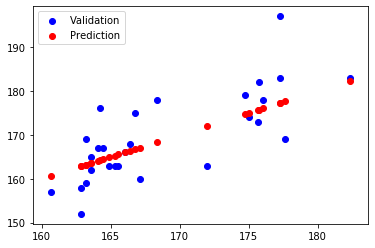

In [23]:
p1 = plt.scatter(X_valid['sex'].values * dense[0] + X_valid['weight'].values * dense[1] + \
                 X_valid['repwt'].values * dense[2] + dense[3], y_valid, c = 'blue')
p2 = plt.scatter(X_valid['sex'].values * dense[0] + X_valid['weight'].values * dense[1] + \
                 X_valid['repwt'].values * dense[2] + dense[3], Y_predict, c = 'red')
plt.legend((p1, p2),("Validation", "Prediction"))
plt.show()

In [24]:
print("Среднеквадратичная ошибка: ", mean_squared_error(y_valid, Y_predict))

Среднеквадратичная ошибка:  44.40968811031085


<h3>Вывод:</h3>
По значению коеффициента среднеквадратичной ошибки можно сказать, что добавление дополнительных признаков положительно повлияло на обучение нашей модели